In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [8]:
data={'area':[26000,30000,32000,36000,40000],'price':[550000,565000,610000,680000,725000]}
df=pd.DataFrame(data)
df

,area,price
0,26000,550000
1,30000,565000
2,32000,610000
3,36000,680000
4,40000,725000


In [9]:
%matplotlib inline


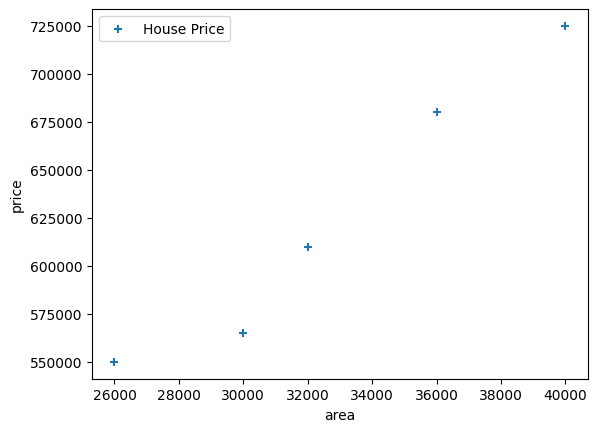

In [32]:
plt.xlabel('area')
plt.ylabel('price')
x=df['area']
y=df['price']
plt.scatter(x,y,label='House Price',marker='+')
plt.legend()

In [33]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
reg.coef_

array([13.57876712])

In [36]:
reg.intercept_

np.float64(180616.43835616432)

In [38]:
reg.predict([[26000]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([533664.38356164])

In [42]:
d=pd.DataFrame({'area':[26000,30000,32000,36000,40000]})

In [43]:
d


,area
0,26000
1,30000
2,32000
3,36000
4,40000


In [54]:
predictions=[]
for value in d['area']:
    pred=reg.predict([[value]])
    predictions.append(pred[0])
d['predictions']=predictions

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-p

In [55]:
d

,area,predictions
0,26000,533664.383562
1,30000,587979.452055
2,32000,615136.986301
3,36000,669452.054795
4,40000,723767.123288


In [57]:
d.to_csv('Predictions.csv', index=False)

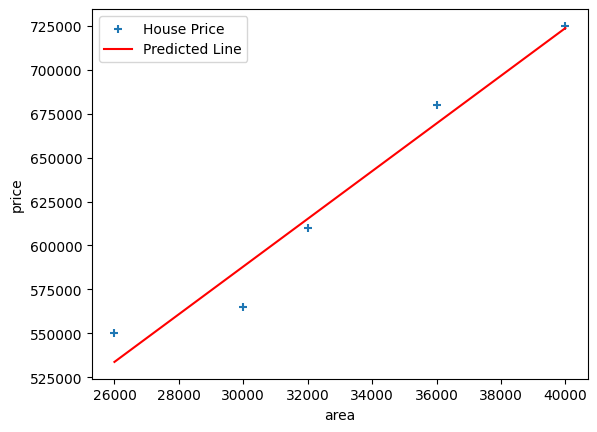

In [60]:
plt.xlabel('area')
plt.ylabel('price')
x=df['area']
y=df['price']
plt.scatter(x,y,label='House Price',marker='+')
plt.plot(x,reg.predict(df[['area']]), label='Predicted Line',color='red')
plt.legend()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [63]:
df

,area,price,predictions
0,26000,550000,533664.383562
1,30000,565000,587979.452055
2,32000,610000,615136.986301
3,36000,680000,669452.054795
4,40000,725000,723767.123288


In [66]:
mbr.append(mean_absolute_error(df['price'],df['predictions']))
msr.append(mean_squared_error(df['price'],df['predictions']))
r2score.append(r2_score(df['price'],df['predictions']))
    
    

In [67]:
mbr

[11246.575342465727]

In [68]:
msr

[186815068.49314982]

In [70]:
r2score

[0.9584301138199489]

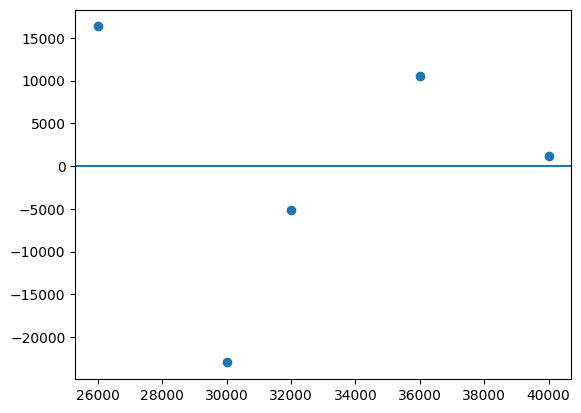

In [72]:
residual=df['price']-df['predictions']
plt.scatter(df['area'],residual)
plt.axhline(0)

In [74]:
#Canada per Capita Income
df1=pd.read_csv('canada_per_capita_income.csv')
df1.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


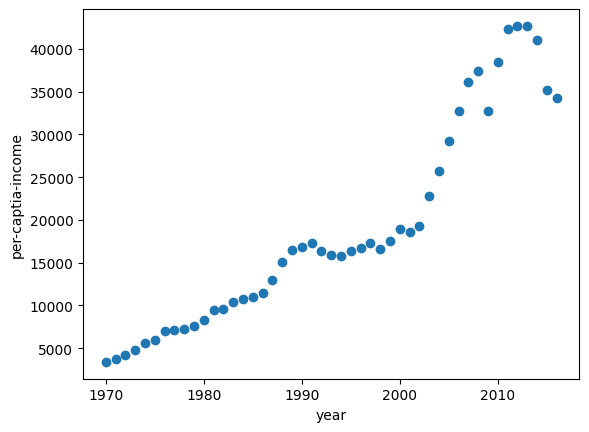

In [76]:
plt.xlabel('year')
plt.ylabel('per-captia-income')
plt.scatter(df1['year'],df1['per capita income (US$)'])

In [77]:
reg1=linear_model.LinearRegression()

In [79]:
reg1.fit(df1[['year']],df1['per capita income (US$)'])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [99]:
reg1.predict([[1970]])

array([-134.55966672])

In [101]:
import warnings
warnings.filterwarnings('ignore')
predict = []

for value in df1['year']:
    predicted = reg1.predict([[value]])
    predict.append(predicted[0])   

df1['predictions']=predict

In [102]:
df1.head()

,year,per capita income (US$),predictions
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634


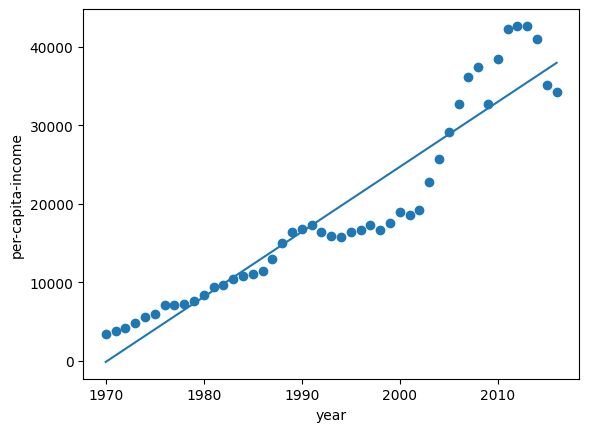

In [103]:
plt.xlabel('year')
plt.ylabel('per-capita-income')
plt.scatter(df1['year'],df1['per capita income (US$)'])
plt.plot(df1['year'],reg1.predict(df1[['year']]))


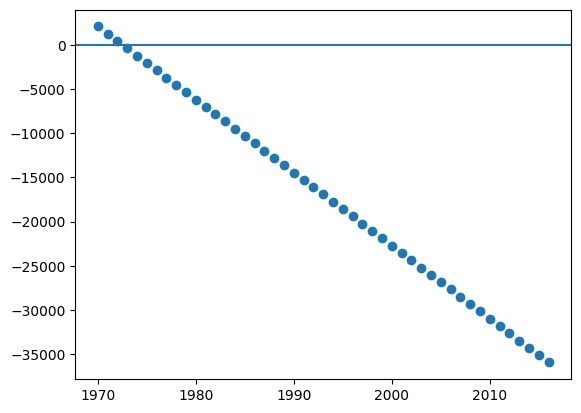

In [105]:
residual1=df1['year']-df1['predictions']
plt.scatter(df1['year'],residual1)
plt.axhline(0)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mbr1=[]
msr1=[]
r2score1=[]
mbr1.append(mean_absolute_error(df['price'],df['predictions']))
msr1.append(mean_squared_error(df['price'],df['predictions']))
r2score1.append(r2_score(df['price'],df['predictions']))

In [112]:
mbr1


[11246.575342465727]

In [113]:

msr1


[186815068.49314982]

In [114]:
r2score1

[0.9584301138199489]

In [115]:
df2=pd.read_csv('homeprices.csv')

In [118]:
df2.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [122]:
df2.bedrooms.fillna(0,inplace=True)

In [123]:
df2['bedrooms']

0    3.0
1    4.0
2    0.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [125]:
reg2=linear_model.LinearRegression()
reg2.fit(df2[['area','bedrooms','age']],df2['price'])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [127]:
reg2.predict([[2600,3.0,20]])

array([521891.50854318])

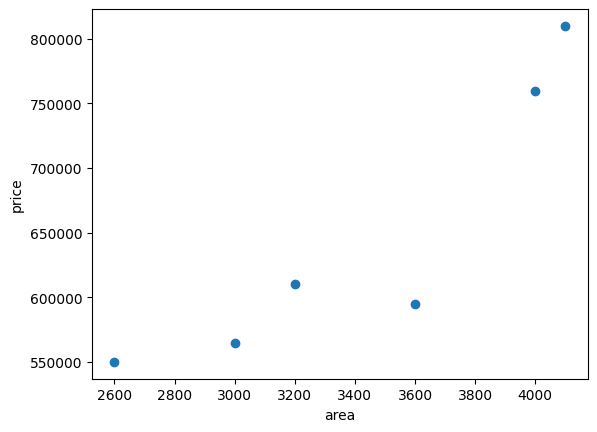

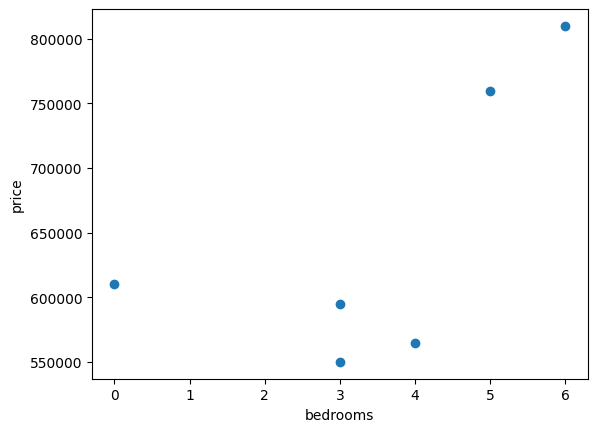

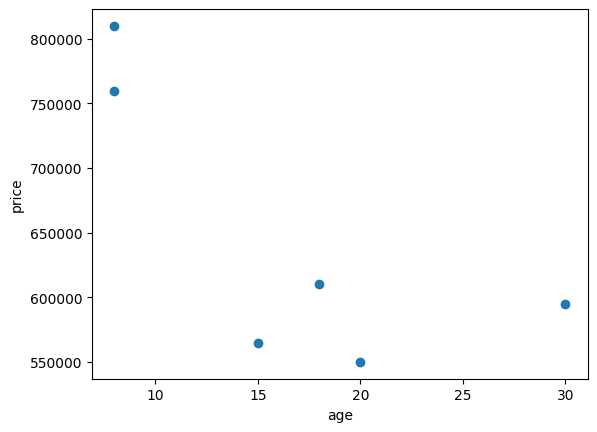

In [132]:
plt.figure()
plt.scatter(df2['area'], df2['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.show()

plt.figure()
plt.scatter(df2['bedrooms'], df2['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

plt.figure()
plt.scatter(df2['age'], df2['price'])
plt.xlabel('age')
plt.ylabel('price')
plt.show()

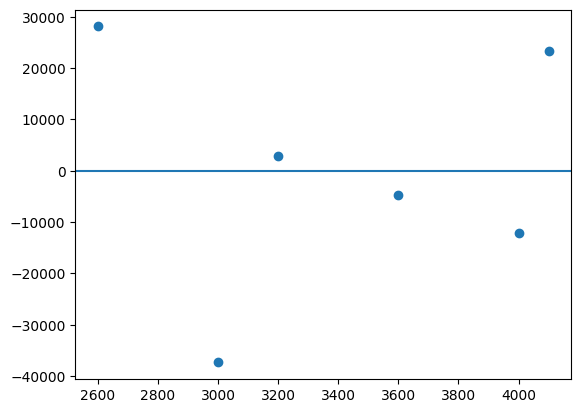

In [134]:
residual=df2['price']-reg2.predict(df2[['area','bedrooms','age']])
plt.scatter(df2['area'],residual)
plt.axhline(0)

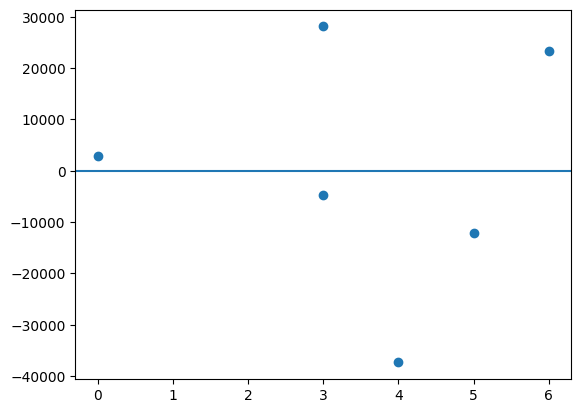

In [135]:
plt.scatter(df2['bedrooms'],residual)
plt.axhline(0)

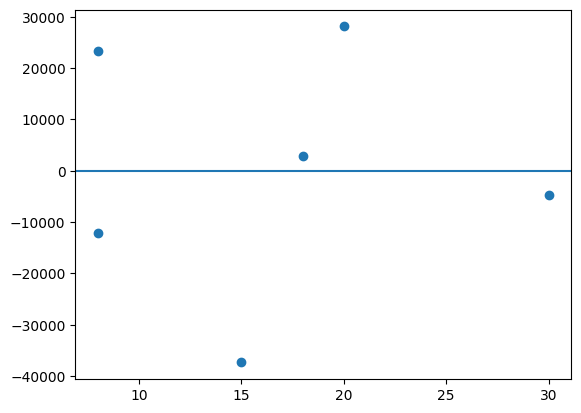

In [136]:
plt.scatter(df2['age'],residual)
plt.axhline(0)